# Querying if points are in polygons

In [1]:
# Imports
from shapely.geometry import Point, Polygon
from shapely.geometry import LineString, MultiLineString
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline

In [2]:
# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [3]:
# Check if p1 or p2 are within the polygon using the within function
print(p1.within(poly))
print(p2.within(poly))

True
False


In [4]:
# Check if p1 or p2 are within the polygon using the contains function
print(poly.contains(p1))
print(poly.contains(p2))


True
False


In [5]:
# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

# Check if intersect
line_a.intersects(line_b)

True

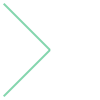

In [6]:
# Show the two lines: they join at ends
multi_line = MultiLineString([line_a, line_b])
multi_line

In [7]:
# Does the line touch with itself?
line_a.touches(line_a)

False

## Point in Polygon using Geopandas
Filter for points within a boundary, defined in a KML file

In [8]:
# Enable the KML-driver by passing 'rw' to whitelist of fiona’s supported drivers:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [9]:
# Read in addresses from previous tutorial
data = gpd.read_file("Data/addresses.shp")

# Read in the KML file
polys = gpd.read_file("Data/PKS_suuralue.kml", driver='KML')
polys.head()

,Name,Description,geometry
0,Suur-Espoonlahti,,POLYGON Z ((24.775059677807 60.1090604462157 0...
1,Suur-Kauklahti,,POLYGON Z ((24.6157775254076 60.1725681273527 ...
2,Vanha-Espoo,,POLYGON Z ((24.6757633262026 60.2120070032819 ...
3,Pohjois-Espoo,,POLYGON Z ((24.767921197401 60.2691954732391 0...
4,Suur-Matinkylä,,POLYGON Z ((24.7536131356802 60.1663051341717 ...


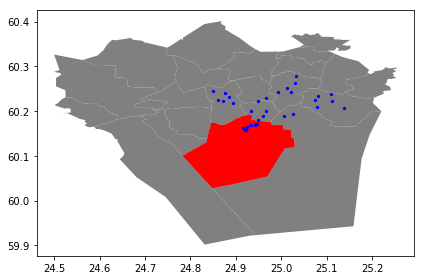

In [10]:
# Plot the southern district of Eteläinen
southern = polys.loc[polys['Name']=='Eteläinen']
southern.reset_index(drop=True, inplace=True)   # Reset the index 
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
data.plot(ax=ax, color='blue', markersize=5);
plt.tight_layout();

In [11]:
# Enable shapely.speedups which makes some of the spatial queries running faster.
shapely.speedups.enable()

#check if the Points are within the geometry of the southern GeoDataFrame
mask = data.within(southern.loc[0, 'geometry'])
print(mask)

0      True
1      True
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool


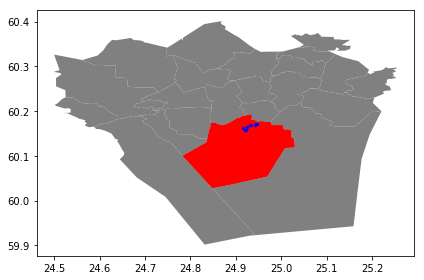

In [12]:
# Plot the points with the mask applied
southern = polys.loc[polys['Name']=='Eteläinen']
southern.reset_index(drop=True, inplace=True)   # Reset the index 
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
data[mask].plot(ax=ax, color='blue', markersize=5);
plt.tight_layout();